In [2]:
%matplotlib inline

In [4]:
# Import the statsmodels formula api for doing OLS regression
import statsmodels.formula.api as smf

# Import a helper function for plotting regression results
from statsmodels.graphics.api import abline_plot

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

np.random.seed(0)

# Regression

Statsmodels has an API for doing regression with R-like formulas.

First, let's create some data to work with.  We'll create a simple linearly related dataset with a little bit of noise.

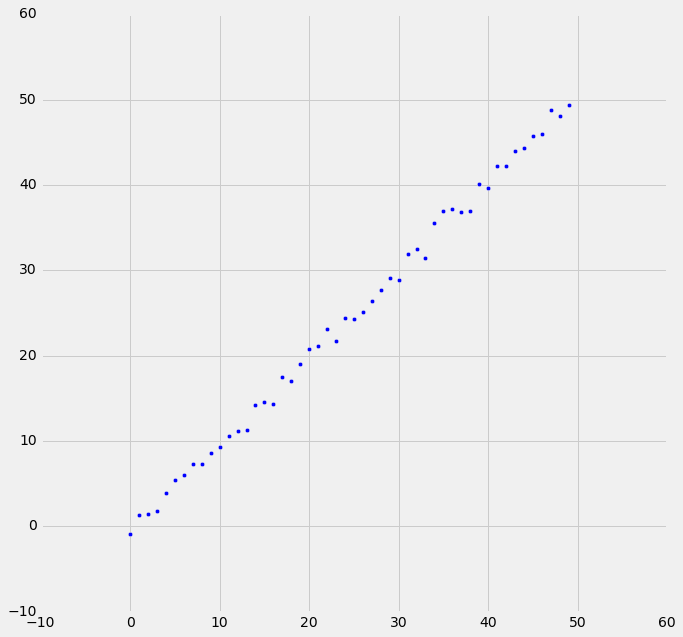

In [6]:
# The size of our dataset
size = 50

# x = [0,1..8,9]
x = np.arange(size)

# Generate noise
noise = np.random.randn(size)

# Make y = x + noise
y = x + noise

# Plot it and see what it looks like:
figure, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

Now to run OLS regression, we first create a dictionary to store x and y:

In [7]:
d = {'x': x, 'y': y}

Then use `smf.ols` with the formula `y ~ x`.  This means regress `y` against `x`. After than, print a summary of the results.

In [8]:
# Run regression.  Note the call to `fit()` after the call to `ols`.
mod = smf.ols(formula='y ~ x', data = d).fit()

# Print the regression results
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.664e+04
Date:                Mon, 30 May 2016   Prob (F-statistic):           1.19e-62
Time:                        16:49:05   Log-Likelihood:                -59.405
No. Observations:                  50   AIC:                             122.8
Df Residuals:                      48   BIC:                             126.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.6129      0.226     -2.715      0.0

There's a lot going on here.  The key pieces are the [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) and the list of variables including the computed coefficient, and the 95% [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval).  Remember, the true value for our x coefficient is 1, so we came pretty close.

We can visualize the line by accessing `mod.params` and plugging those numbers into the equation for a line:

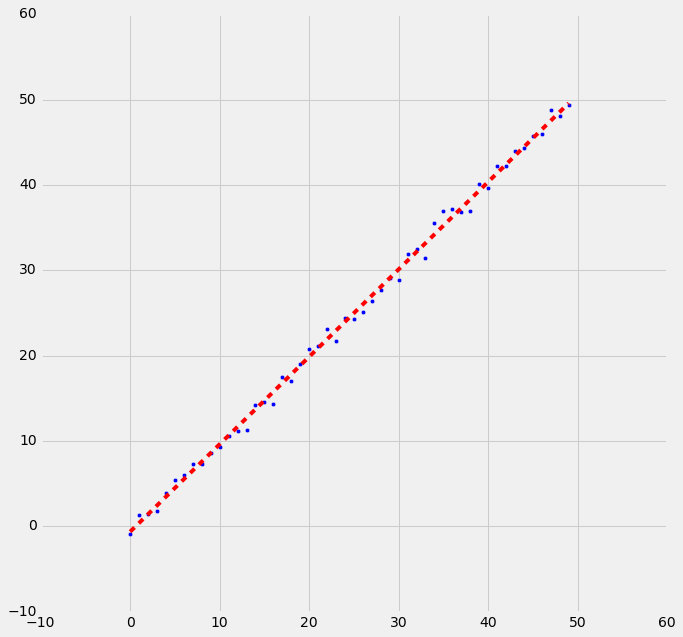

In [9]:
figure, ax = plt.subplots(figsize=(10,10))

# Scatter the actual points
ax.scatter(x, y)

# The regression line is the intercept (`mod.params[0]`) + the coefficent for x (`mod.params[1]`) times x.
r = mod.params[0] + mod.params[1] * x

ax.plot(x,r, 'r--')

It's also possible to plot to make the same plot using the `statsmodels` model. The following cell creates a scatter plot of the true values versus the predicted values.

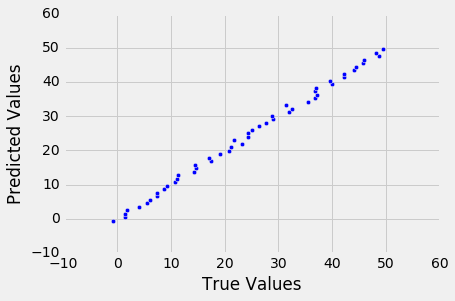

In [11]:
plt.scatter(y, mod.predict())
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

We can have more than one dependent variable.  Additional variables can be included by using `+` in the regression formula.

In [18]:
# Create 3 random variables: a, b and c
a = np.random.randn(size)
b = np.random.randn(size)
c = np.random.randn(size)

# Make y = a + 2b + 3c + noise
y = a + 2*b + 3*c + np.random.randn(size)/2

# Create dictionary
d = {'a': a, 'b': b, 'c': c, 'y': y}

# Run Regression with all three independent variables
mod = smf.ols(formula='y ~ a + b + c', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1214.
Date:                Wed, 18 May 2016   Prob (F-statistic):           8.88e-44
Time:                        14:25:26   Log-Likelihood:                -26.715
No. Observations:                  50   AIC:                             61.43
Df Residuals:                      46   BIC:                             69.08
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0581      0.065     -0.901      0.3

Even though it's linear regression, we can still introduce nonlinearity if we have a hunch of what it is beforehand.  For example, if we think that the relationship is a second degree polynomial we can do the following:

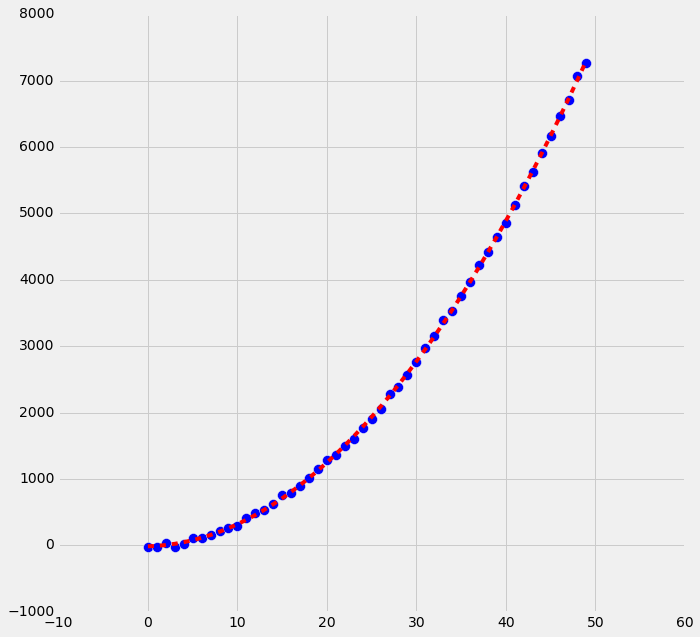

In [24]:
# Create x
x = np.arange(size)

# Create x^2
x2 = x**2

# Make y = 2x + 3x^2 + noise
y = x*2 + 3*x2 + np.random.randn(size)*25

# Store in a dict
d = {'x': x, 'x2': x2, 'y': y}

# When running the regression, include x^2 as one of the independent variables
mod = smf.ols(formula='y ~ x + x2', data = d).fit()

# Visualize the regression
figure, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y, s=100)
r = mod.params[0] + mod.params[1]*x + mod.params[2]*x2
ax.plot(x,r, 'r--')

Variables aren't always numerical.  For instance, gender or nationality.  These are considered categorical variables.  

We'll use one of statsmodels [built-in datasets](http://statsmodels.sourceforge.net/0.6.0/datasets/index.html) to explore this.

The [Grunfeld](http://statsmodels.sourceforge.net/0.6.0/datasets/generated/grunfeld.html) dataset has investment data for several firms over a period of 20 years.  We can load this data like so:

In [34]:
# Import statsmodels api
import statsmodels.api as sm

# Load the data as a pandas dataframe
d = sm.datasets.grunfeld.load_pandas().data

# Display the first few rows of data
d.head()

,invest,value,capital,firm,year
0,317.6,3078.5,2.8,b'General Motors',1935.0
1,391.8,4661.7,52.6,b'General Motors',1936.0
2,410.6,5387.1,156.9,b'General Motors',1937.0
3,257.7,2792.2,209.2,b'General Motors',1938.0
4,330.8,4313.2,203.4,b'General Motors',1939.0


If we want to build a model for the market value of a firm, the firm itself is an important factor.  Here we can include the firm as a categorial variable in our model by using 'C(firm)' in the formula:

In [35]:
mod = smf.ols(formula='value ~ invest + capital + year + C(firm)', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     414.8
Date:                Wed, 18 May 2016   Prob (F-statistic):          7.45e-140
Time:                        15:00:15   Log-Likelihood:                -1523.7
No. Observations:                 220   AIC:                             3075.
Df Residuals:                     206   BIC:                             3123.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
Intercept       

As you can see, each value of the categorical variable is treated as a separate independent variable.  When doing this, one of the categories gets left out as the default.  In this case that was 'American Steel'.  Then you can assess the impact of belonging to one of the categories versus 'American Steel'.  For comparison, here is the regression without the firms:

In [38]:
mod = smf.ols(formula='value ~ invest + capital + year', data = d).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     229.0
Date:                Wed, 18 May 2016   Prob (F-statistic):           8.41e-67
Time:                        15:18:20   Log-Likelihood:                -1729.6
No. Observations:                 220   AIC:                             3467.
Df Residuals:                     216   BIC:                             3481.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   4.463e+04   1.67e+04      2.677      0.0